In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from sklearn import tree

In [35]:
carta = pd.read_csv('cartaapc_dashboard.zip')

In [36]:
carta.stop_id = carta['stop_id'].astype(str)
carta.route_id = carta['route_id'].astype(str)
carta.service_period = carta['service_period'].astype(str)
carta.hour = carta['hour'].astype(str)

In [37]:
carta.trip_date = pd.to_datetime(carta['trip_date'], format="%Y-%m-%d")
carta.trip_start_time = pd.to_datetime(carta['trip_start_time'], format="%H:%M:%S")
carta.date_time = pd.to_datetime(carta['date_time'], format = "%Y-%m-%d %H:%M:%S")
carta.date = pd.to_datetime(carta['date'], format = "%Y-%m-%d")
carta.arrival_time = pd.to_datetime(carta['arrival_time'], format = "%H:%M:%S")

In [38]:
carta['month'] = carta['date'].dt.month
carta.month = carta['month'].astype(str)

In [39]:
carta.hour = carta['hour'].astype(str)

In [40]:
carta = carta.dropna(axis = 0)

In [41]:
carta.head()

,trip_id,arrival_time,stop_id,stop_sequence,stop_lat,stop_lon,route_id,direction_id,board_count,alight_count,occupancy,direction_desc,service_period,date,date_time,trip_start_time,day_of_week,trip_date,hour,month
0,139145,1900-01-01 08:51:00,354,1,35.056167,-85.268713,16,0,0,0,0,OUTBOUND,Weekday,2019-11-01,2019-11-01 08:51:00,1900-01-01 08:51:00,4,2019-11-01,8,11
1,139145,1900-01-01 08:54:59,505,2,35.056017,-85.281080,16,0,0,0,0,OUTBOUND,Weekday,2019-11-01,2019-11-01 08:54:59,1900-01-01 08:51:00,4,2019-11-01,8,11
2,139145,1900-01-01 09:05:00,1713,3,35.042000,-85.308670,16,0,1,1,0,OUTBOUND,Weekday,2019-11-01,2019-11-01 09:05:00,1900-01-01 08:51:00,4,2019-11-01,9,11
3,139145,1900-01-01 09:05:21,1560,4,35.042880,-85.309102,16,0,0,0,0,OUTBOUND,Weekday,2019-11-01,2019-11-01 09:05:21,1900-01-01 08:51:00,4,2019-11-01,9,11
4,139145,1900-01-01 09:05:39,163,5,35.043448,-85.309277,16,0,0,0,0,OUTBOUND,Weekday,2019-11-01,2019-11-01 09:05:39,1900-01-01 08:51:00,4,2019-11-01,9,11


In [42]:
carta.route_id.unique()

array(['16', '9', '1', '10G', '10A', '7', '19', '3', '10C', '13', '4',
       '2', '21', '28', '8', '15'], dtype=object)

In [43]:
carta_routes = carta['route_id']

In [45]:
route_categories = []

for i in carta_routes:
    if i == '10G':
        category = '101'
    elif i == '10A':
        category = '102'
    elif i == '10C':
        category = '103'
    else:
        category = i
    route_categories.append(category)

In [47]:
carta['route_id'] = route_categories

In [48]:
carta.head()

,trip_id,arrival_time,stop_id,stop_sequence,stop_lat,stop_lon,route_id,direction_id,board_count,alight_count,occupancy,direction_desc,service_period,date,date_time,trip_start_time,day_of_week,trip_date,hour,month
0,139145,1900-01-01 08:51:00,354,1,35.056167,-85.268713,16,0,0,0,0,OUTBOUND,Weekday,2019-11-01,2019-11-01 08:51:00,1900-01-01 08:51:00,4,2019-11-01,8,11
1,139145,1900-01-01 08:54:59,505,2,35.056017,-85.281080,16,0,0,0,0,OUTBOUND,Weekday,2019-11-01,2019-11-01 08:54:59,1900-01-01 08:51:00,4,2019-11-01,8,11
2,139145,1900-01-01 09:05:00,1713,3,35.042000,-85.308670,16,0,1,1,0,OUTBOUND,Weekday,2019-11-01,2019-11-01 09:05:00,1900-01-01 08:51:00,4,2019-11-01,9,11
3,139145,1900-01-01 09:05:21,1560,4,35.042880,-85.309102,16,0,0,0,0,OUTBOUND,Weekday,2019-11-01,2019-11-01 09:05:21,1900-01-01 08:51:00,4,2019-11-01,9,11
4,139145,1900-01-01 09:05:39,163,5,35.043448,-85.309277,16,0,0,0,0,OUTBOUND,Weekday,2019-11-01,2019-11-01 09:05:39,1900-01-01 08:51:00,4,2019-11-01,9,11


In [49]:
X = carta[['day_of_week','route_id', 'direction_id', 'month', 'hour', 'board_count', 'alight_count']]
X.head()

,day_of_week,route_id,direction_id,month,hour,board_count,alight_count
0,4,16,0,11,8,0,0
1,4,16,0,11,8,0,0
2,4,16,0,11,9,1,1
3,4,16,0,11,9,0,0
4,4,16,0,11,9,0,0


In [50]:
X_dt = X.groupby(['day_of_week', 'route_id', 'direction_id', 'month', 'hour']).agg(['mean', 'var'])

In [51]:
X_dt.head()

board_count            \
                                                    mean       var   
day_of_week route_id direction_id month hour                         
0           1        0            1     10      0.288754  0.907221   
                                        11      0.352459  1.043986   
                                        12      0.307692  0.697976   
                                        13      0.234483  0.602267   
                                        14      0.324895  0.737217   

                                             alight_count            
                                                     mean       var  
day_of_week route_id direction_id month hour                         
0           1        0            1     10       0.200608  0.612073  
                                        11       0.372951  1.930294  
                                        12       0.251748  0.694295  
                                        13       0.193103  0.661544  
                                        14       0.350211  1.025138

In [52]:
X_DF = X_dt.reset_index(level = ['day_of_week', 'route_id', 'direction_id','month', 'hour'])
X_DF.head()

day_of_week route_id direction_id month hour board_count            \
                                                      mean       var   
0           0        1            0     1   10    0.288754  0.907221   
1           0        1            0     1   11    0.352459  1.043986   
2           0        1            0     1   12    0.307692  0.697976   
3           0        1            0     1   13    0.234483  0.602267   
4           0        1            0     1   14    0.324895  0.737217   

  alight_count            
          mean       var  
0     0.200608  0.612073  
1     0.372951  1.930294  
2     0.251748  0.694295  
3     0.193103  0.661544  
4     0.350211  1.025138

In [53]:
X_DF.columns = ['day_of_week', 'route_id', 'direction_id', 'month', 'hour', 'board_mean', 'board_var', 'alight_mean', 'alight_var']
X_DF.head()

,day_of_week,route_id,direction_id,month,hour,board_mean,board_var,alight_mean,alight_var
0,0,1,0,1,10,0.288754,0.907221,0.200608,0.612073
1,0,1,0,1,11,0.352459,1.043986,0.372951,1.930294
2,0,1,0,1,12,0.307692,0.697976,0.251748,0.694295
3,0,1,0,1,13,0.234483,0.602267,0.193103,0.661544
4,0,1,0,1,14,0.324895,0.737217,0.350211,1.025138


In [54]:
X_DF = X_DF.dropna(axis = 0)

In [55]:
X_DF_gamma = X_DF.drop(['alight_mean', 'alight_var'], axis = 1)
X_DF_alpha = X_DF.drop(['board_mean', 'board_var'], axis = 1)

In [56]:
gamma_poiss_assump = X_DF_gamma['board_mean']/(X_DF_gamma['board_var'] )
gamma_poiss_assump = gamma_poiss_assump.replace(np.nan, 888)
gamma_poiss_assump = gamma_poiss_assump.astype('float')
gamma_poiss_assump = np.array(gamma_poiss_assump)

(array([30109.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1946.]),
 array([2.19159596e-02, 8.88197244e+01, 1.77617533e+02, 2.66415341e+02,
        3.55213150e+02, 4.44010958e+02, 5.32808766e+02, 6.21606575e+02,
        7.10404383e+02, 7.99202192e+02, 8.88000000e+02]),
 <BarContainer object of 10 artists>)

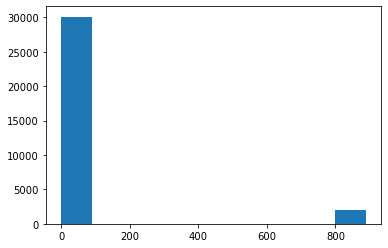

In [57]:
plt.hist(gamma_poiss_assump)

In [58]:
Poiss_Assump_gamma = []

for i in gamma_poiss_assump:
    if i > 1.25:
        condition = 'Mean_Greater_Var'
    elif i < 0.75:
        condition = 'Overdispersion'
    else:
        condition = 'Poisson'
    Poiss_Assump_gamma.append(condition)

In [59]:
alpha_poiss_assump = X_DF_alpha['alight_mean']/(X_DF_alpha['alight_var'])
alpha_poiss_assump = alpha_poiss_assump.replace(np.nan, 888)
alpha_poiss_assump = alpha_poiss_assump.astype('float')
alpha_poiss_assump = np.array(alpha_poiss_assump)

In [60]:
Poiss_Assump_alpha = []

for i in alpha_poiss_assump:
    if i > 1.25:
        condition = 'Mean_Greater_Var'
    elif i < 0.75:
        condition = 'Overdispersion'
    else:
        condition = 'Poisson'
    Poiss_Assump_alpha.append(condition)

# Classification Methods

## Training and Testing Sets

### Board Counts

In [61]:
X_DF_gamma.head()

,day_of_week,route_id,direction_id,month,hour,board_mean,board_var
0,0,1,0,1,10,0.288754,0.907221
1,0,1,0,1,11,0.352459,1.043986
2,0,1,0,1,12,0.307692,0.697976
3,0,1,0,1,13,0.234483,0.602267
4,0,1,0,1,14,0.324895,0.737217


# Training and Testing Sets

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, gam_assump_train, gam_assump_test = train_test_split(X_DF_gamma, Poiss_Assump_gamma, train_size = 0.8, test_size=0.2)

In [64]:
classf_tree = tree.DecisionTreeClassifier()
classf_tree = classf_tree.fit(x_train, gam_assump_train)

In [65]:
classf_tree_pred = classf_tree.predict(x_test)

In [67]:
Conf_Mat_Tree = confusion_matrix(gam_assump_test, classf_tree_pred)
Conf_Mat_Tree

array([[ 393,    0,    0],
       [   0, 5169,   23],
       [   0,   14,  812]])

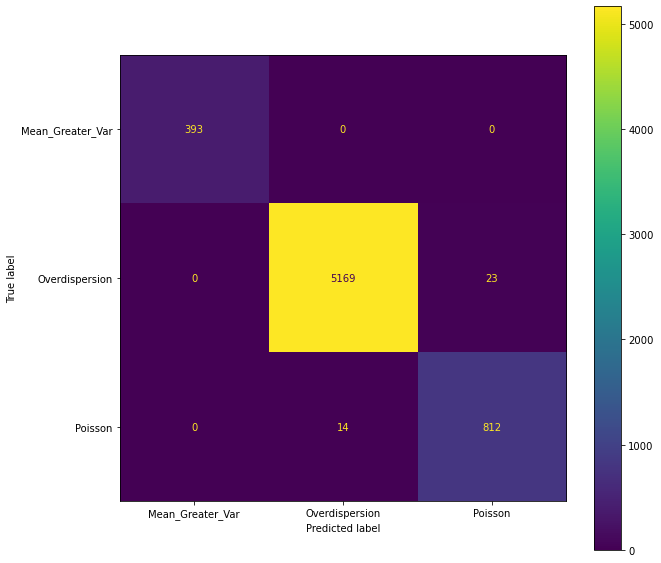

In [78]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))
plot_mat = plot_confusion_matrix(classf_tree, x_test, gam_assump_test,
                                ax = ax)
plt.show() 

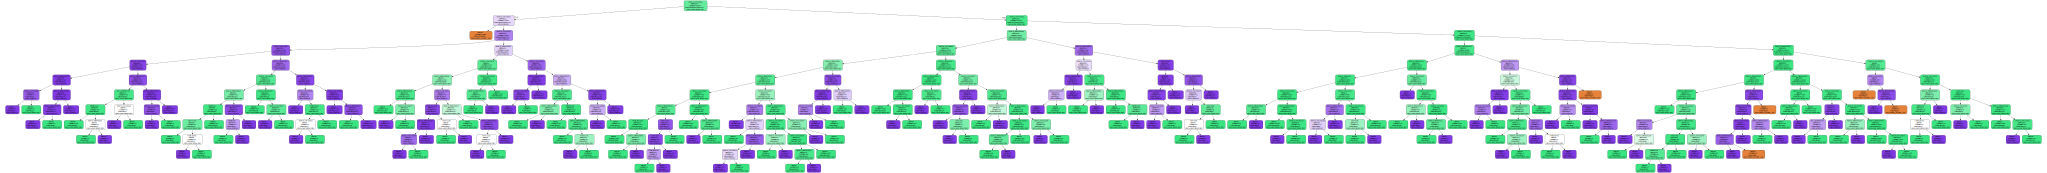

In [95]:
import graphviz

dot_data = tree.export_graphviz(classf_tree, out_file = None, 
                                feature_names = x_train.columns,
                                class_names = ['Mean_Greater_Var', 'Overdispersion', 'Poisson'],
                                filled = True, rounded = True,  
                                special_characters = True)  
graph = graphviz.Source(dot_data)  
graph 

# Unsupervised Nearest neighbors

## Cluster Analysis